#Análisis Exploratorio de Dataset "Moda sostenible: tendencias ecológicas".
#Fuente: https://www.kaggle.com/datasets/waqi786/sustainable-fashion-eco-friendly-trends

#IMPORTACIÓN DE BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#CARGA DE DATOS

In [ ]:
ms = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sustainable_fashion_trends_2024.csv')
ms.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [ ]:
#Cantidad de filas y columnas
ms.shape

(5000, 15)

In [ ]:
# Determinar el rango de años del estudio
min_year = ms['Year'].min()  # Año mínimo
max_year = ms['Year'].max()  # Año máximo

# Imprimir el rango de años
print(f"El rango de años es de {min_year} a {max_year}.")

El rango de años es de 2010 a 2024.


In [ ]:
#Resumen del dataset
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

#PREPARACIÓN Y LIMPIEZA DE DATOS

In [ ]:
#ELIMINACIÓN DE COLUMNAS "Brand_ID" y "Brand_Name"
ms = ms.drop(['Brand_ID', 'Brand_Name'], axis=1)
ms.shape

(5000, 13)

In [ ]:
ms.head()

,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [ ]:
ms.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [ ]:
# Mostrar el conteo de valores nulos por columna
print(ms.isnull().sum())

Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64


In [ ]:
#ELIMINACIÓN DE VALORES NULOS
ms ['Certifications'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Certifications
Non-Null Count  Dtype 
--------------  ----- 
3996 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [ ]:
ms['Certifications'].describe()

,Certifications
count,3996
unique,4
top,GOTS
freq,1050


In [ ]:
#Reemplazar los valores NaN con la moda
ms['Certifications'].fillna(ms['Certifications'].mode()[0], inplace=True)

In [ ]:
#Verificación del cambio:
print(ms['Certifications'].isnull().sum())

0


In [ ]:
#Valores nulos de la columna "Certifications"

ms[ms['Certifications'].isnull()]


,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications


#ANÁLISIS DESCRIPTIVO

In [ ]:
ms.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [ ]:
#Resumen estadístico sin incluir el año
desc = ms.drop(columns=['Year']).describe().round(2)
print("\nResumen estadístico redondeado (sin 'Year'):")
print(desc)


Resumen estadístico redondeado (sin 'Year'):
       Carbon_Footprint_MT  Water_Usage_Liters  Waste_Production_KG  \
count              5000.00             5000.00              5000.00   
mean                250.32          2517861.75             50107.30   
std                 142.80          1429043.09             28746.38   
min                   1.04            50106.18              1026.38   
25%                 126.62          1293086.84             25340.80   
50%                 250.65          2499096.00             50466.34   
75%                 372.26          3763859.55             74984.65   
max                 499.93          4999596.61             99947.85   

       Product_Lines  Average_Price_USD  
count        5000.00            5000.00  
mean           10.43             259.35  
std             5.71             137.73  
min             1.00              20.02  
25%             5.00             142.86  
50%            10.00             258.62  
75%            15.00

In [ ]:
#Variables categóricas
for column in ms.select_dtypes(include=['object']).columns:
    frequency_table = ms[column].value_counts()
    print(f"\nTabla de frecuencia para '{column}':")
    print(frequency_table)


Tabla de frecuencia para 'Country':
Country
UK           515
Germany      507
Italy        506
USA          505
India        503
China        502
Brazil       500
Australia    499
France       497
Japan        466
Name: count, dtype: int64

Tabla de frecuencia para 'Sustainability_Rating':
Sustainability_Rating
B    1278
D    1249
C    1242
A    1231
Name: count, dtype: int64

Tabla de frecuencia para 'Material_Type':
Material_Type
Recycled Polyester    867
Hemp                  844
Vegan Leather         833
Bamboo Fabric         820
Tencel                819
Organic Cotton        817
Name: count, dtype: int64

Tabla de frecuencia para 'Eco_Friendly_Manufacturing':
Eco_Friendly_Manufacturing
Yes    2520
No     2480
Name: count, dtype: int64

Tabla de frecuencia para 'Recycling_Programs':
Recycling_Programs
Yes    2528
No     2472
Name: count, dtype: int64

Tabla de frecuencia para 'Market_Trend':
Market_Trend
Stable       1709
Declining    1679
Growing      1612
Name: count, dtype: in

#VISUALIZACIÓN DE DATOS

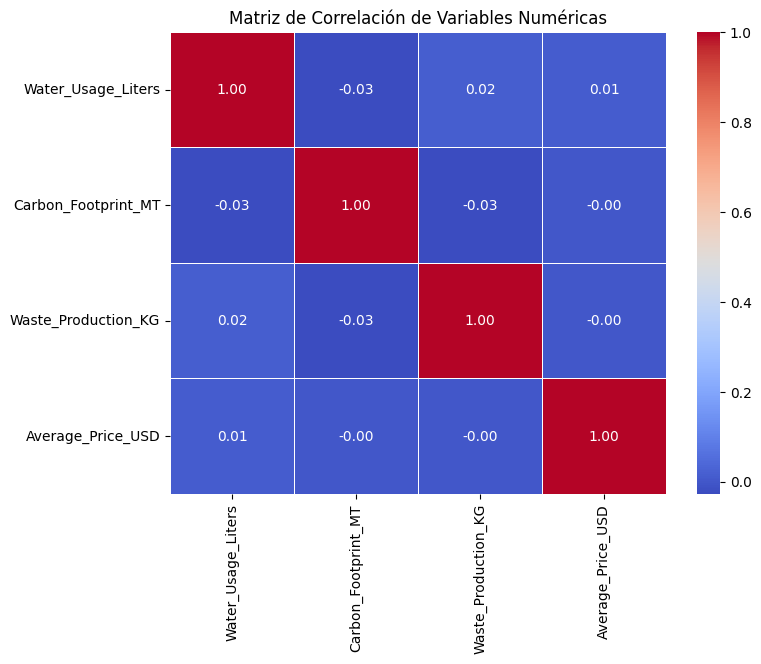

In [ ]:
#MATRIZ DE CORRELACIÓN
ms = pd.DataFrame(ms)

#Seleccionar solo las columnas numéricas excepto 'Year'
num_columns = ['Water_Usage_Liters', 'Carbon_Footprint_MT', 'Waste_Production_KG', 'Average_Price_USD']

#Calcular la matriz de correlación
correlation_matrix = ms[num_columns].corr()

#Crear el mapa de calor para la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

#Títulos y etiquetas
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

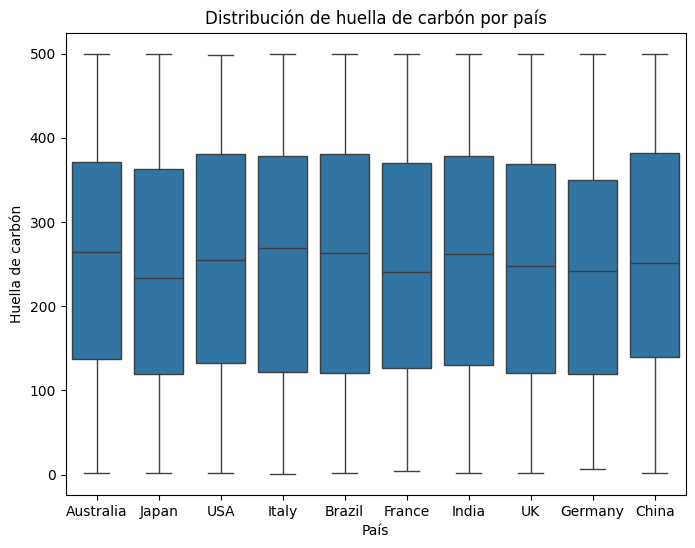

In [ ]:
#DISTRIBUCIÓN DE LA HUELLA DE CARBÓN POR PAÍS
ms = pd.DataFrame(ms)

#Boxplot para 'carbon footprint' agrupado por 'country'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country', y='Carbon_Footprint_MT', data=ms)

#Títulos y etiquetas
plt.title('Distribución de huella de carbón por país')
plt.xlabel('País')
plt.ylabel('Huella de carbón')

# Mostrar el gráfico
plt.show()

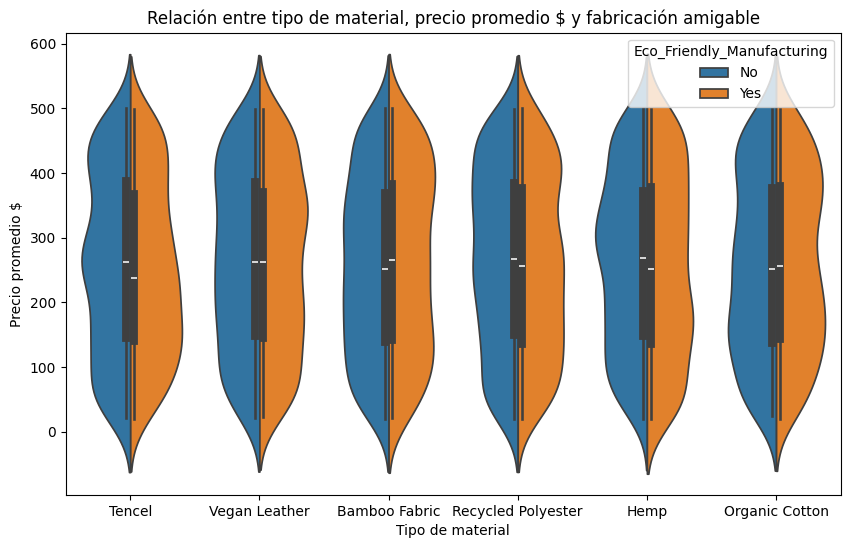

In [ ]:
#RELACIÓN ENTRE TIPO DE MATERIAL, PRECIO PROMEDIO ($) Y FABRICACIÓN AMIGABLE
plt.figure(figsize=(10, 6))
sns.violinplot(x='Material_Type', y='Average_Price_USD', hue='Eco_Friendly_Manufacturing', data=ms, split=True)

# Títulos y etiquetas
plt.title('Relación entre tipo de material, precio promedio $ y fabricación amigable')
plt.xlabel('Tipo de material')
plt.ylabel('Precio promedio $')

# Mostrar el gráfico
plt.show()


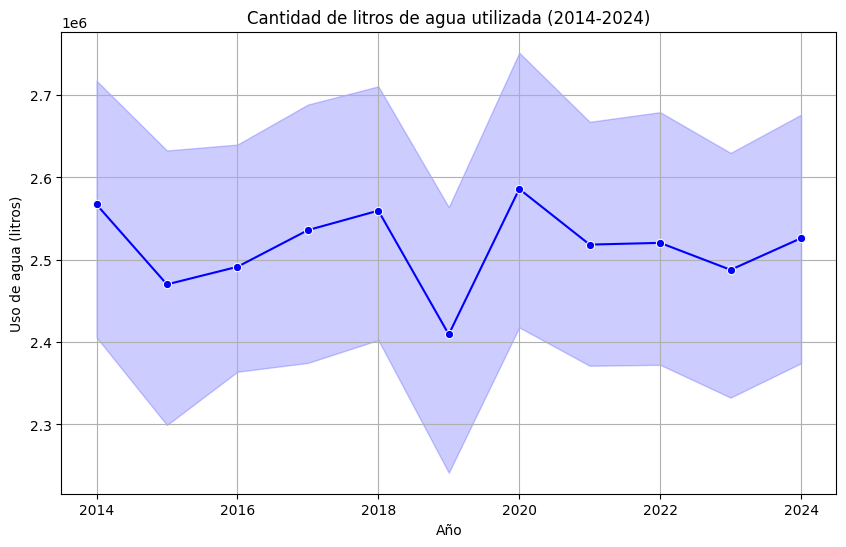

In [ ]:
ms = pd.DataFrame(ms)

#Filtrar los datos del 2014 al 2024
ms_filtered = ms[(ms['Year'] >= 2014) & (ms['Year'] <= 2024)]

#Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Water_Usage_Liters', data=ms_filtered, marker='o', color='b')

# Títulos y etiquetas
plt.title('Cantidad de litros de agua utilizada (2014-2024)')
plt.xlabel('Año')
plt.ylabel('Uso de agua (litros)')

# Mostrar el gráfico
plt.grid(True)
plt.show()

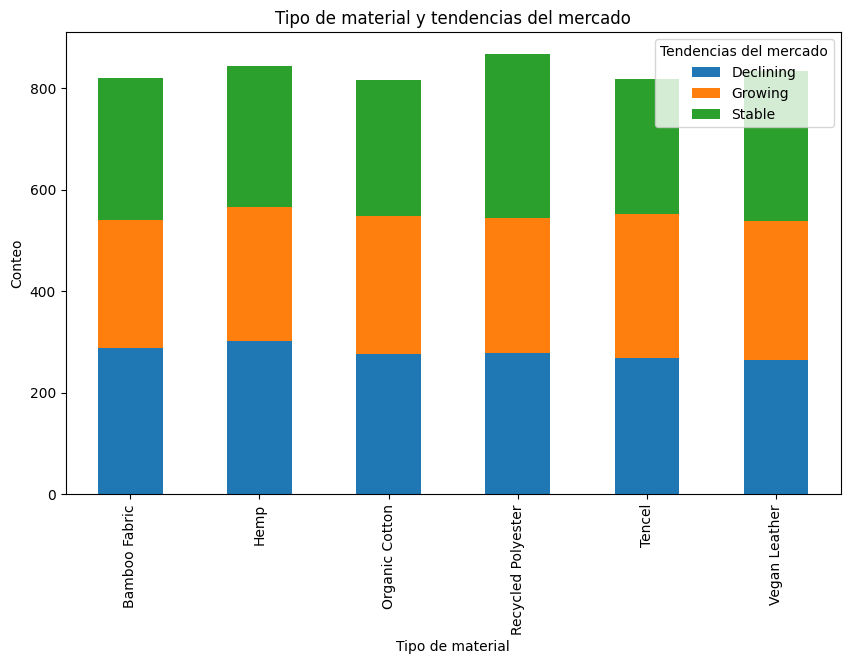

In [ ]:
#MAPA DE CALOR TIPO DE MATERIAL Y TENDENCIA DEL MERCADO
ms = pd.DataFrame(ms)

#Contar ocurrencias
count_data = ms.groupby(['Material_Type', 'Market_Trend']).size().unstack(fill_value=0)

#Crear gráfico de barras apiladas
count_data.plot(kind='bar', stacked=True, figsize=(10, 6))

#Títulos y etiquetas
plt.title('Tipo de material y tendencias del mercado')
plt.xlabel('Tipo de material')
plt.ylabel('Conteo')
plt.legend(title='Tendencias del mercado')

# Mostrar el gráfico
plt.show()

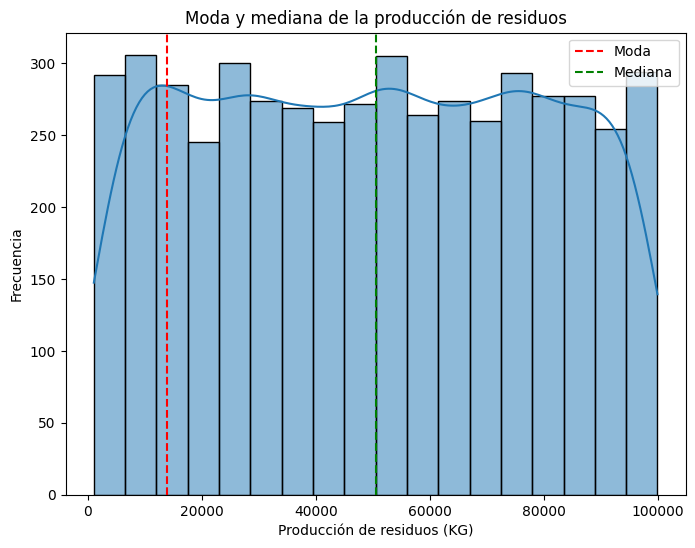

In [ ]:
#MODA Y MEDIANA PARA LA VARIABLES Waste_Production_KG

import matplotlib.pyplot as plt
# Calcular la moda y la mediana para la variable Waste_Production_KG
mode_waste = ms['Waste_Production_KG'].mode()[0]
median_waste = ms['Waste_Production_KG'].median()

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.histplot(ms['Waste_Production_KG'], kde=True)
plt.axvline(mode_waste, color='red', linestyle='--', label='Moda')
plt.axvline(median_waste, color='green', linestyle='--', label='Mediana')
plt.xlabel('Producción de residuos (KG)')
plt.ylabel('Frecuencia')
plt.title('Moda y mediana de la producción de residuos')
plt.legend()
plt.show()


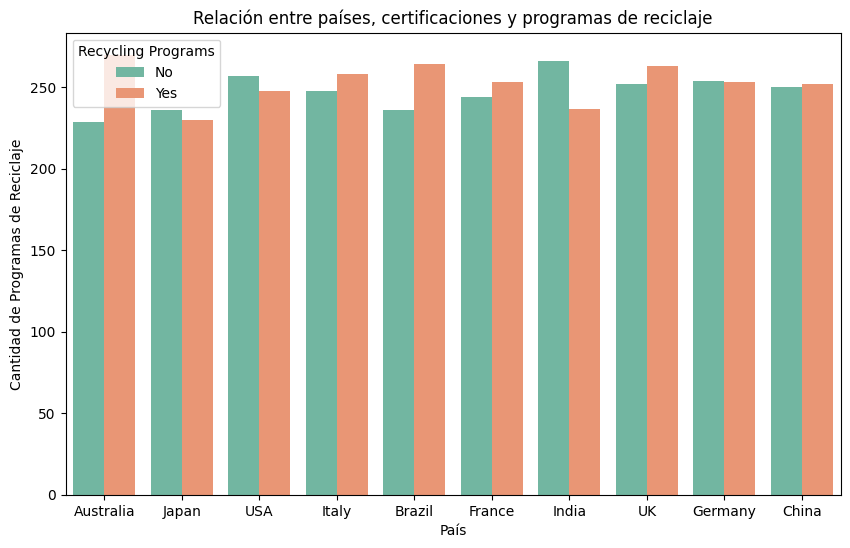

In [ ]:
ms = pd.DataFrame(ms)

#Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.countplot(x='Country', hue='Recycling_Programs', data=ms, palette='Set2')

# Títulos y etiquetas
plt.title('Relación entre países, certificaciones y programas de reciclaje')
plt.xlabel('País')
plt.ylabel('Cantidad de Programas de Reciclaje')
plt.legend(title='Recycling Programs')

# Mostrar el gráfico
plt.show()
